In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
milk = pd.read_csv(r"..\Datasets\milk.csv", index_col=0)

In [6]:
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(milk)
milkscaled = scaler.transform(milk)

In [29]:
pca_sk = PCA().set_output(transform='pandas')
pricipal_components = pca_sk.fit_transform(milkscaled)
pricipal_components.corr()

,pca0,pca1,pca2,pca3,pca4
pca0,1.000000e+00,3.829858e-17,-9.420071e-17,-7.181664e-17,-5.678597e-17
pca1,3.829858e-17,1.000000e+00,-1.969443e-16,2.402340e-16,2.374435e-16
pca2,-9.420071e-17,-1.969443e-16,1.000000e+00,4.924075e-17,-1.168051e-16
pca3,-7.181664e-17,2.402340e-16,4.924075e-17,1.000000e+00,0.000000e+00
pca4,-5.678597e-17,2.374435e-16,-1.168051e-16,0.000000e+00,1.000000e+00


In [9]:
pricipal_components.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [30]:
values, vectors = np.linalg.eig(milkscaled.cov())

print(pca_sk.explained_variance_)

print(np.sum(pca_sk.explained_variance_))
print(pca_sk.explained_variance_ratio_)
print(pca_sk.explained_variance_ratio_ * 100)



[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]
5.208333333333336
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]


In [13]:
values, vectors = np.linalg.eig(milkscaled.cov())
values

array([4.0404117 , 0.92437238, 0.00656977, 0.13429088, 0.1026886 ])

In [14]:
vectors

array([[-0.47294379,  0.35285509, -0.70967042,  0.36921298,  0.10893632],
       [ 0.46657047,  0.32094099, -0.1930657 ,  0.15196177, -0.78672876],
       [ 0.44868269, -0.47603724, -0.66831106, -0.30699163,  0.17660367],
       [-0.48289116,  0.05951482, -0.11159049, -0.77642589, -0.38468756],
       [ 0.35232959,  0.73643513,  0.00118661, -0.378825  ,  0.43590982]])

In [31]:

print(pca_sk.explained_variance_)

tot_var = np.sum(pca_sk.explained_variance_)
print(pca_sk.explained_variance_/tot_var)







[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]


In [32]:
print(pca_sk.explained_variance_ratio_)
print(pca_sk.explained_variance_ratio_ * 100)
print(np.cumsum(pca_sk.explained_variance_ratio_))

[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]
[0.77575905 0.95323854 0.97902239 0.9987386  1.        ]


In [16]:
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [22]:
an = milk.reset_index()
an

,Animal,water,protein,fat,lactose,ash
0,HORSE,90.1,2.6,1.0,6.9,0.35
1,ORANGUTAN,88.5,1.4,3.5,6.0,0.24
2,MONKEY,88.4,2.2,2.7,6.4,0.18
3,DONKEY,90.3,1.7,1.4,6.2,0.40
4,HIPPO,90.4,0.6,4.5,4.4,0.10
5,CAMEL,87.7,3.5,3.4,4.8,0.71
6,BISON,86.9,4.8,1.7,5.7,0.90
7,BUFFALO,82.1,5.9,7.9,4.7,0.78
8,GUINEA PIG,81.9,7.4,7.2,2.7,0.85
9,CAT,81.6,10.1,6.3,4.4,0.75


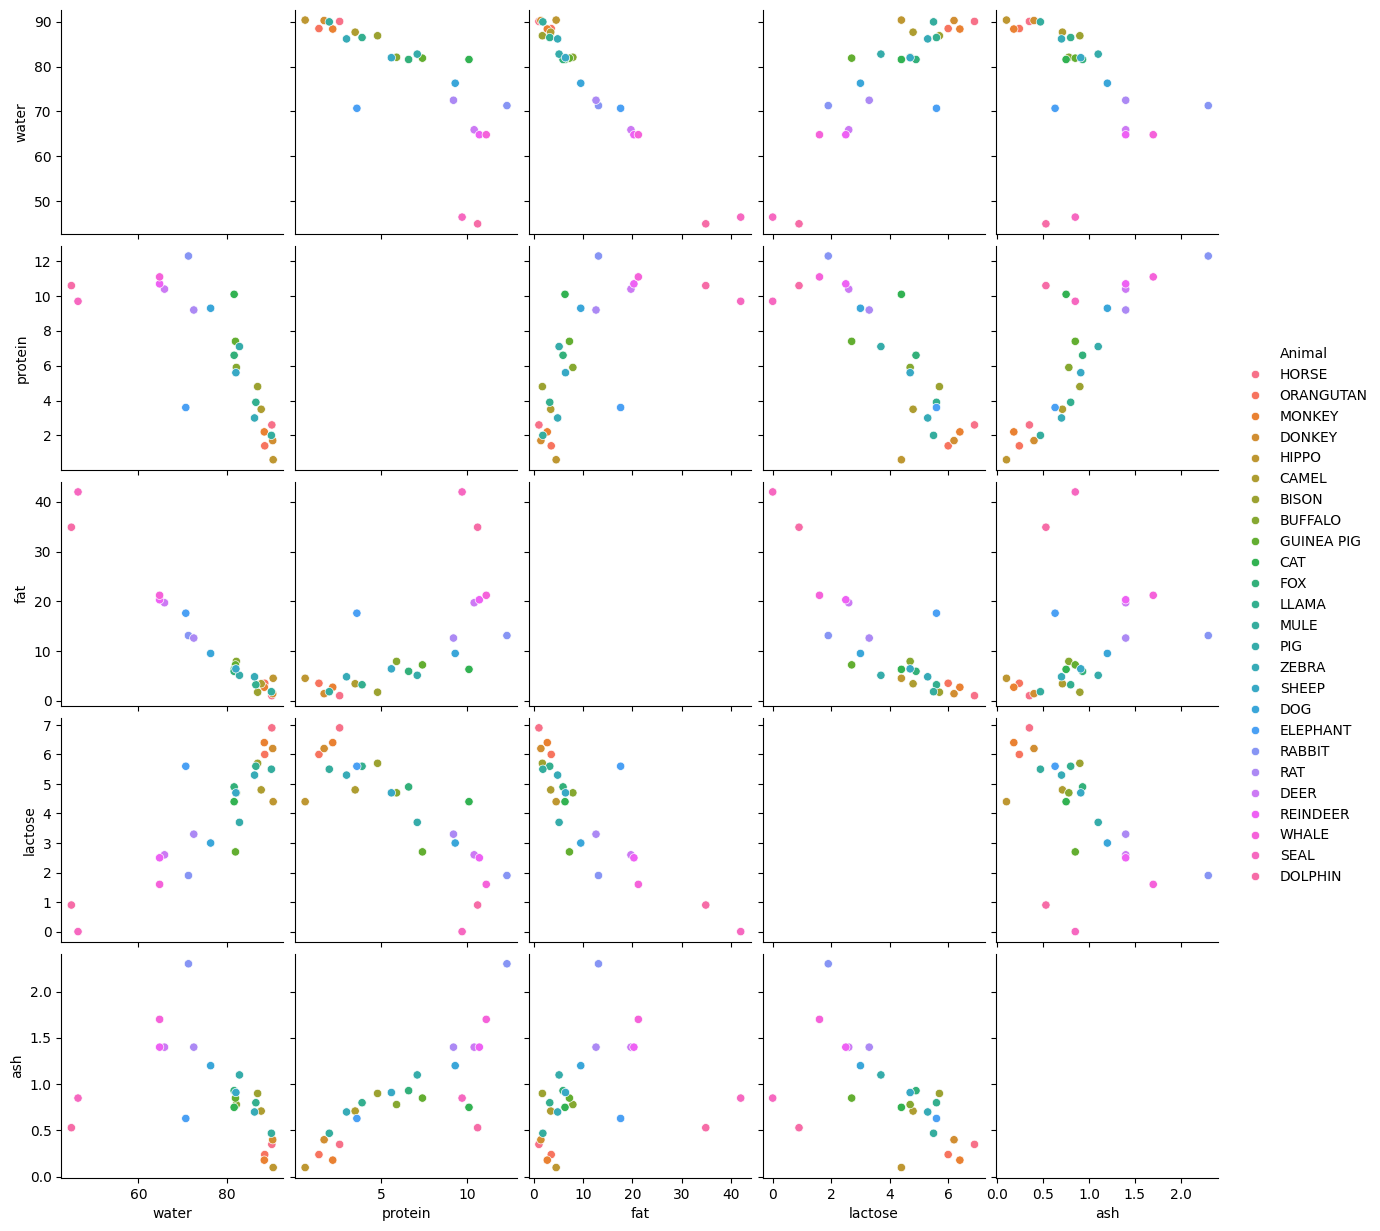

In [23]:
sns.pairplot(an, hue='Animal')

In [28]:
!pip install pca

   ---------------------------------------- 0.0/51.3 kB ? eta -:--:--
   ---------------------------------------- 51.3/51.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/9.8 MB 12.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.8 MB 24.3 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.8 MB 33.4 MB/s eta 0:00:01
   ------------------------------------- -- 9.3/9.8 MB 42.4 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 42.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 35.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.9 MB/s eta 0:00:00


In [35]:
from pca import pca

model = pca()

[scatterd] >INFO> Create scatterplot


[pca] >Cleaning previous fitted model results..
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


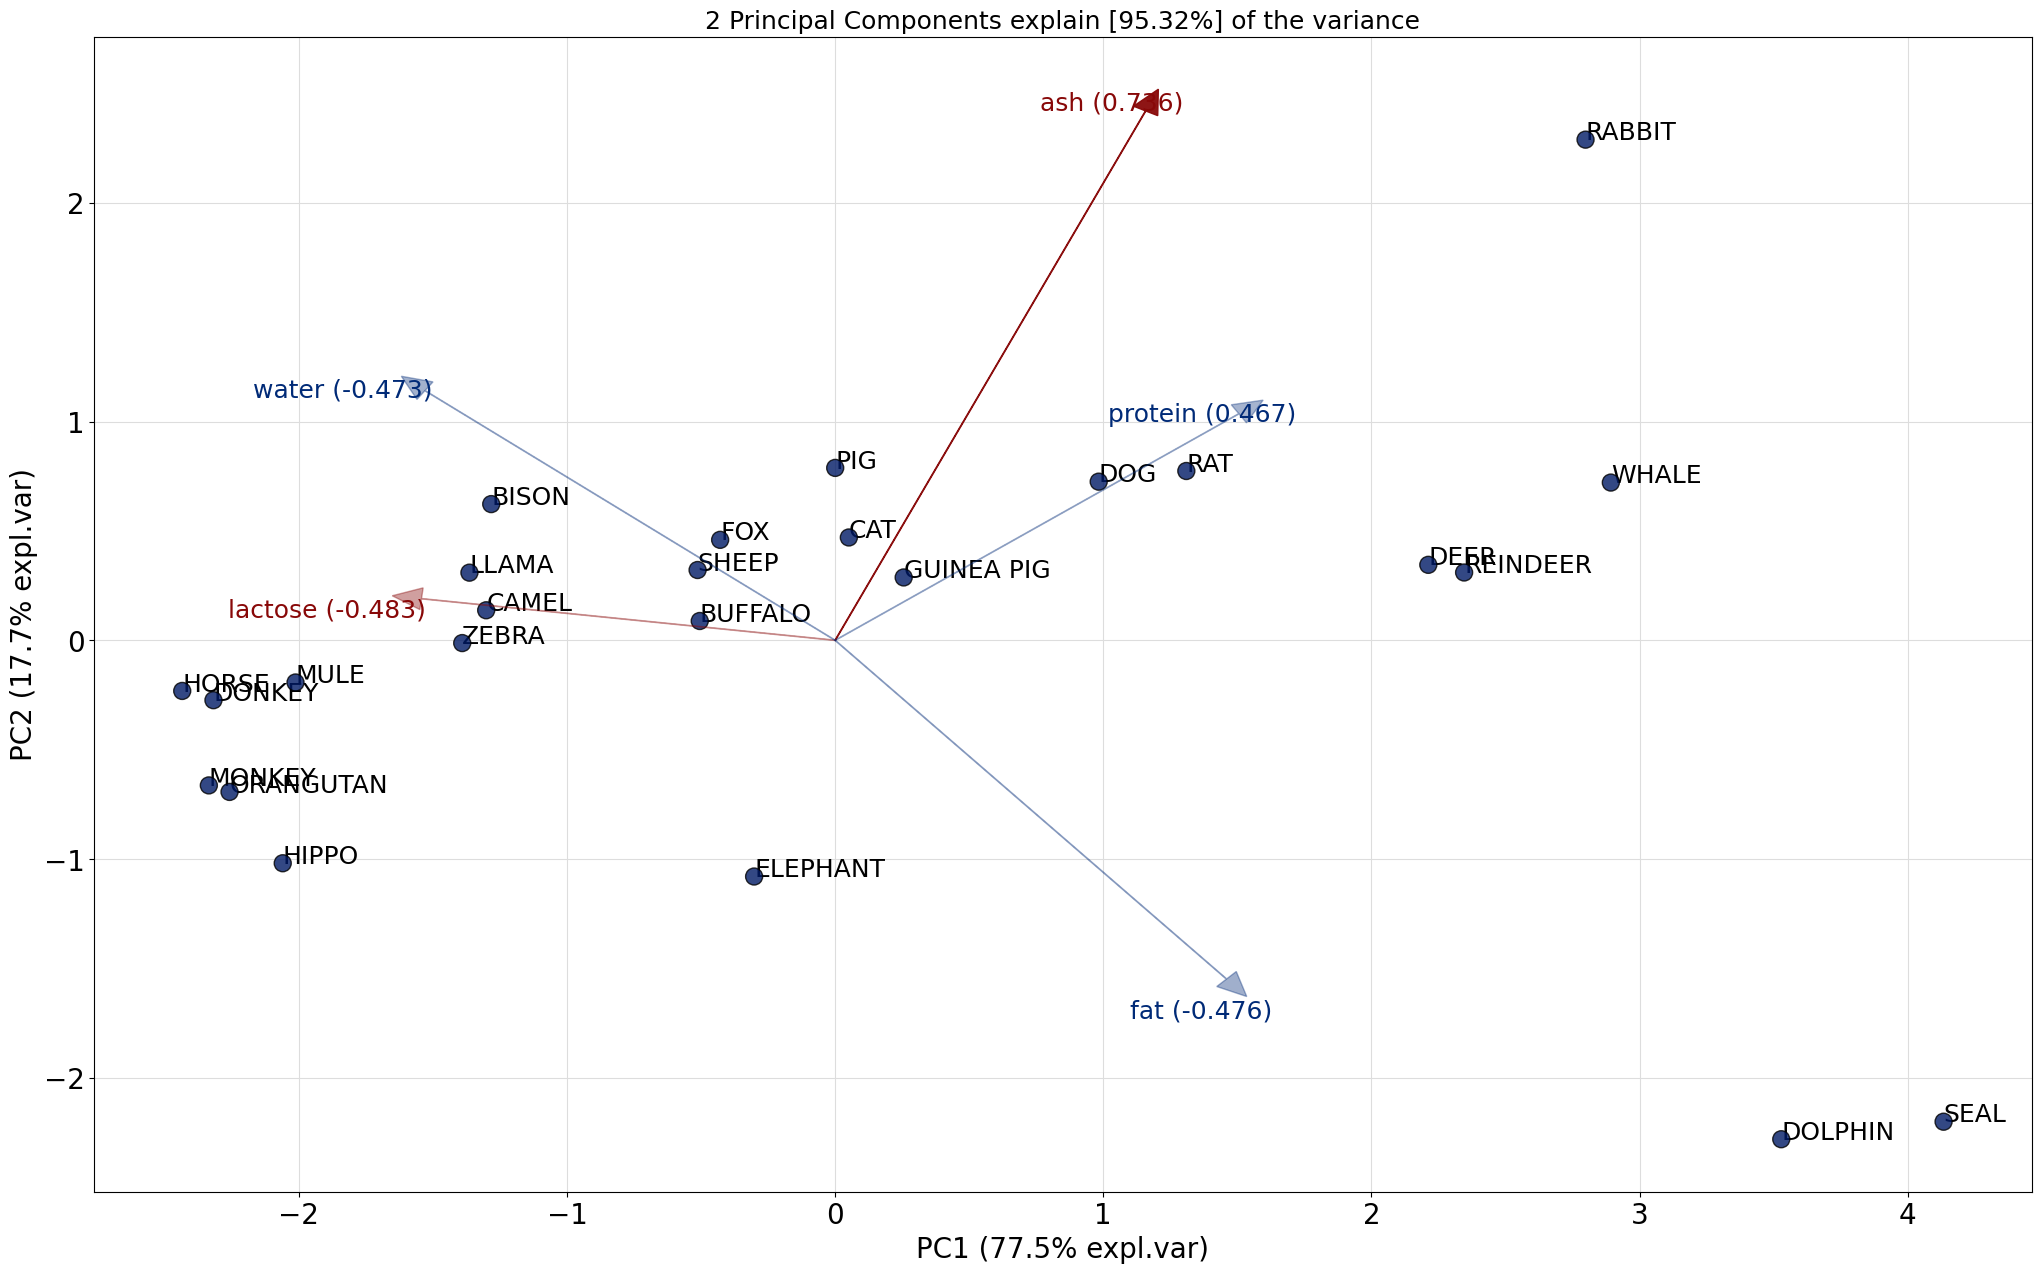

In [38]:
results = model.fit_transform(milkscaled, col_labels=milk.columns, row_labels=list(milk.index))
model.biplot(label=True, legend=True)
for i in np.arange(0, milk.shape[0]):
    plt.text(pricipal_components.values[i,0],
             pricipal_components.values[i,1],
             list(milk.index)[i])
plt.show()

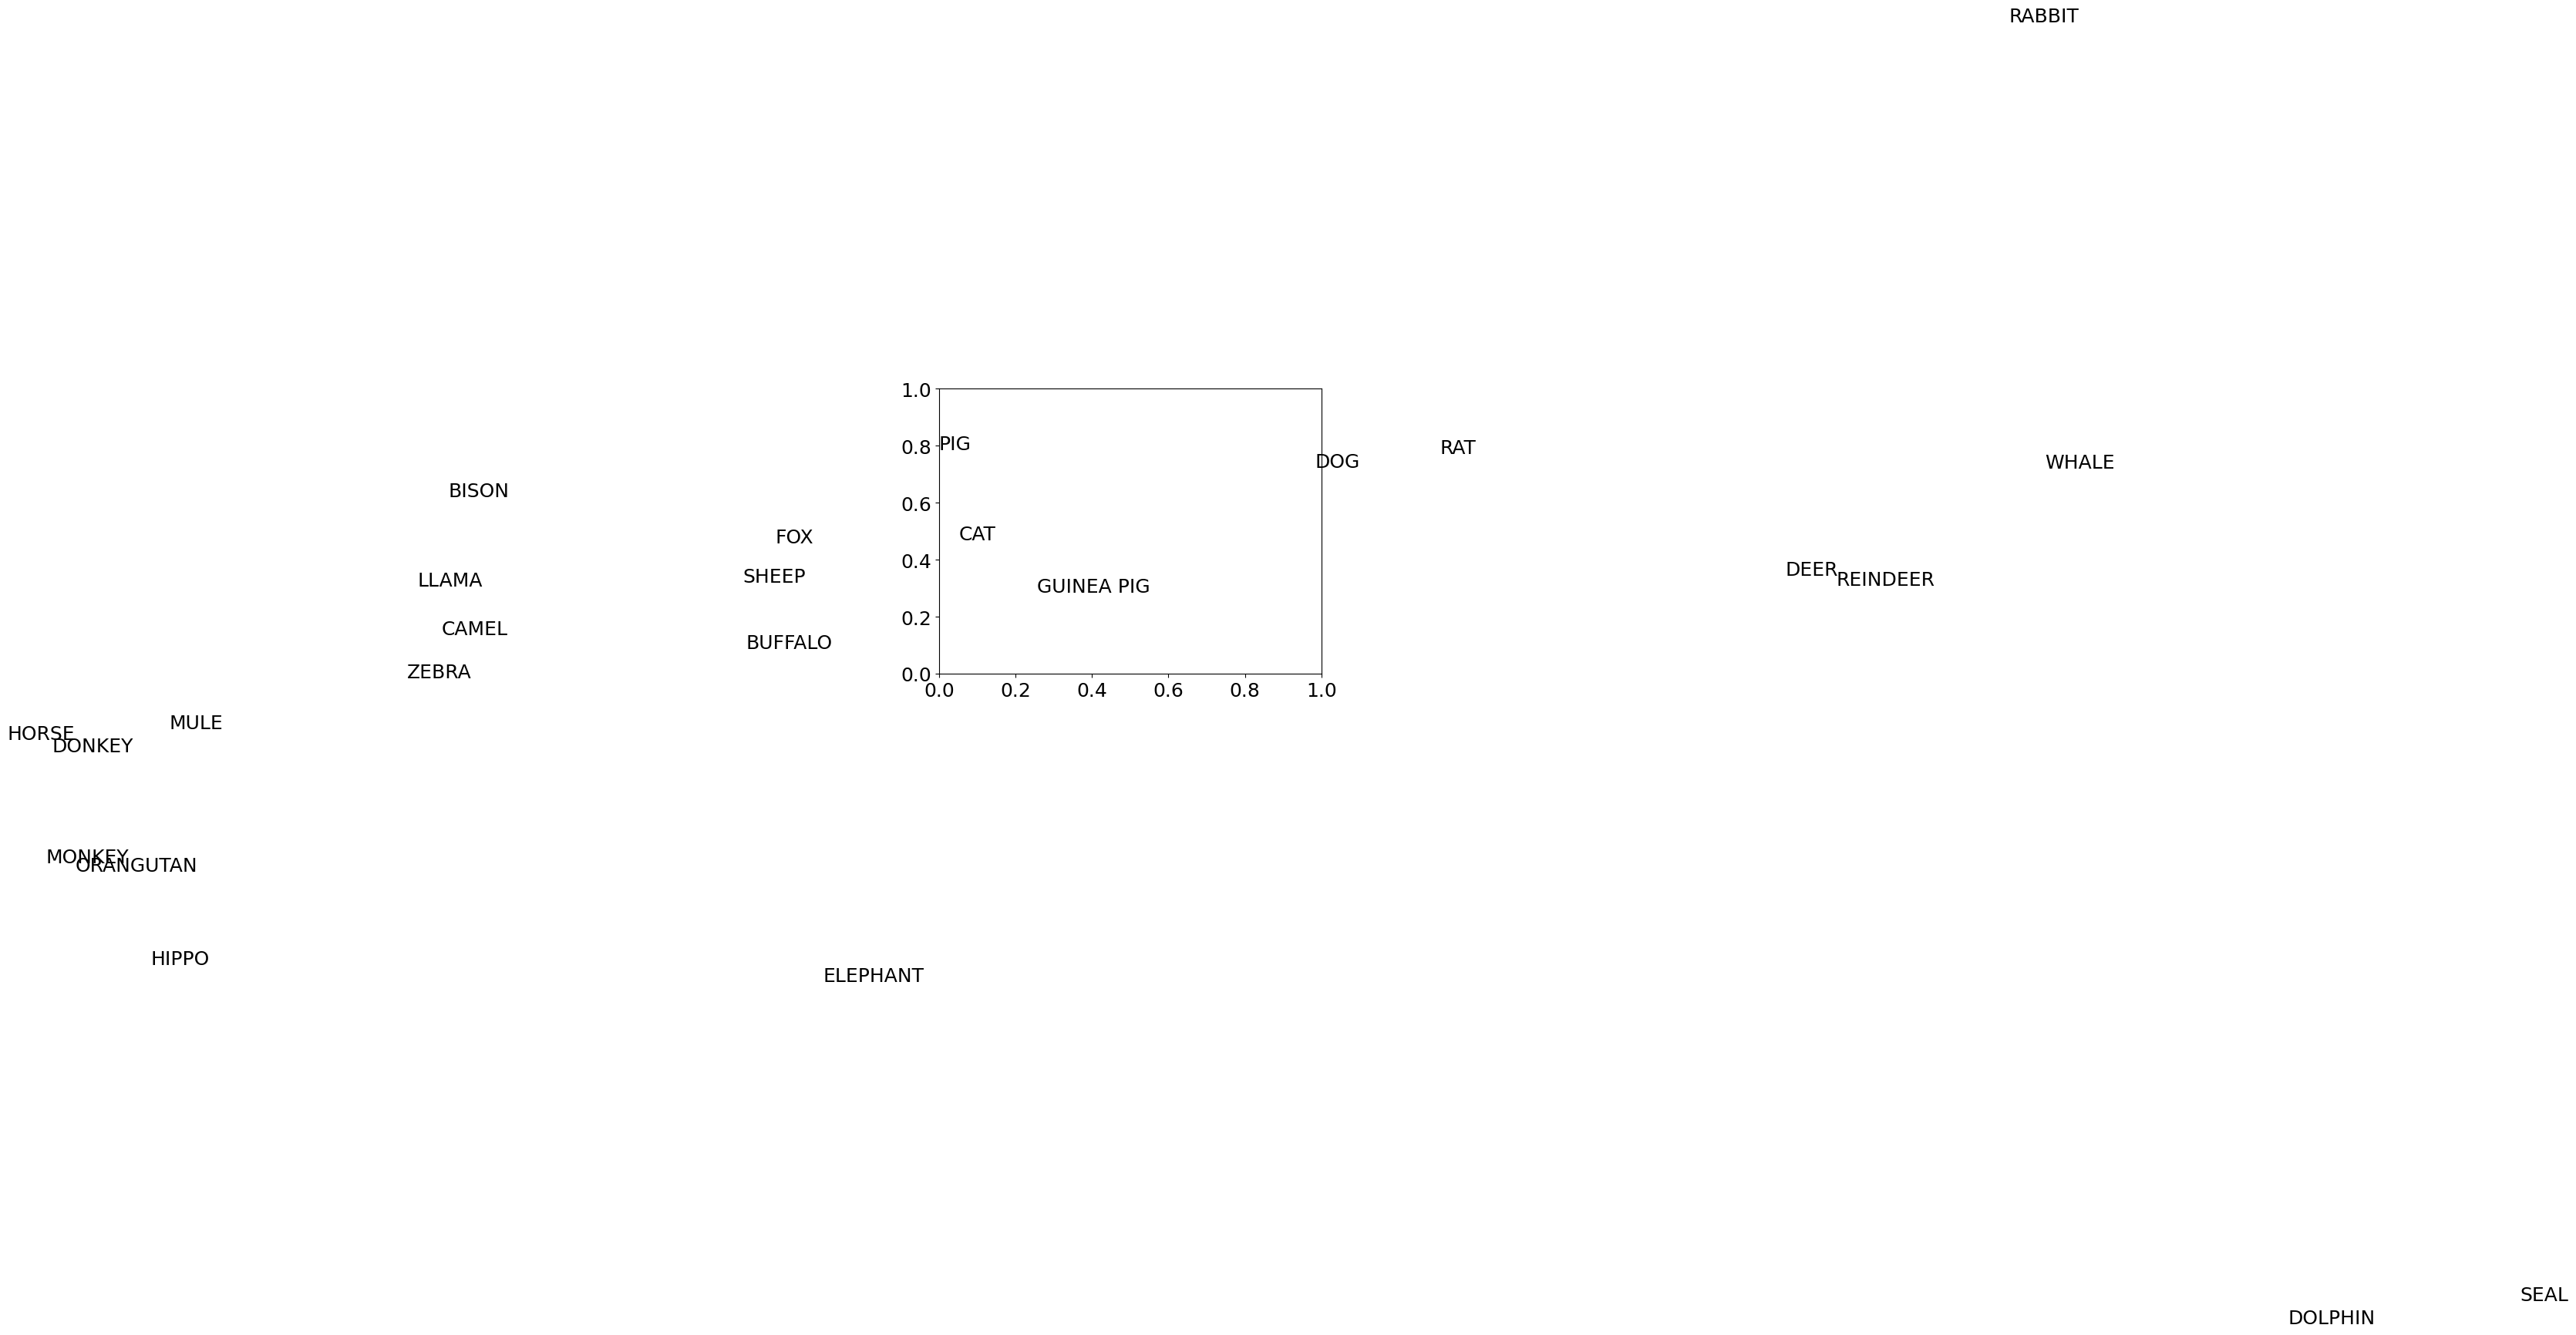